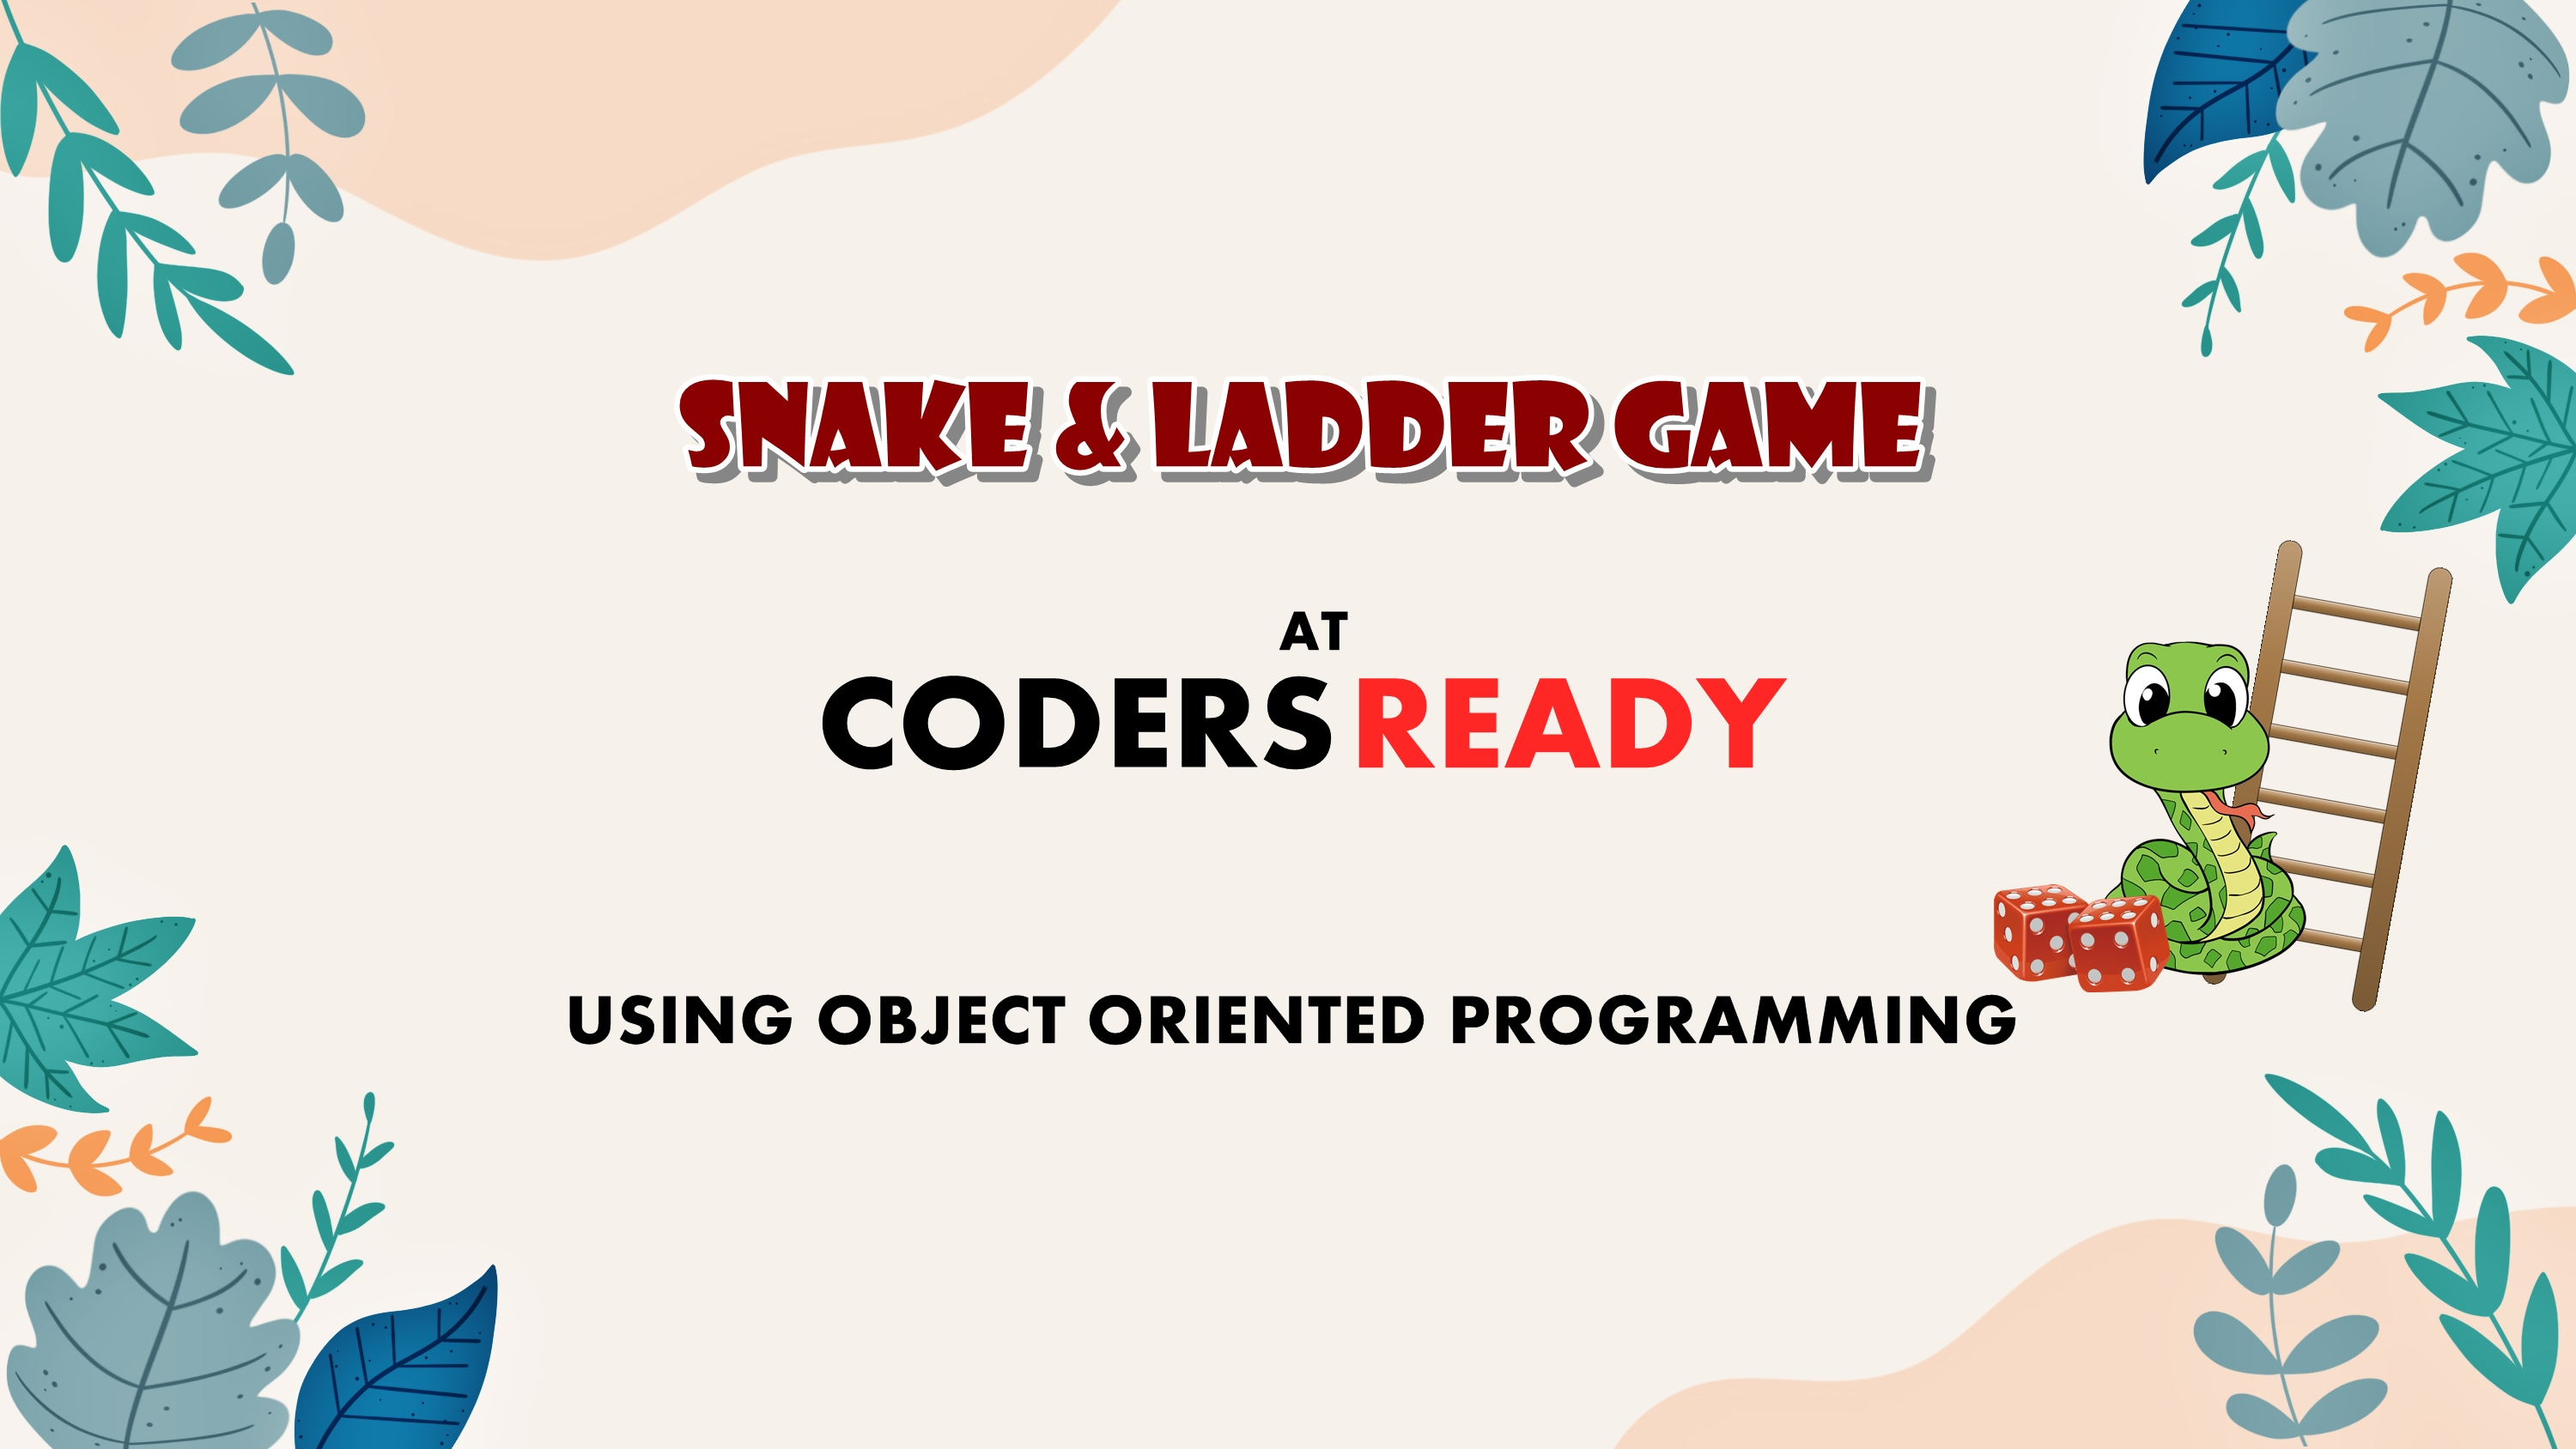

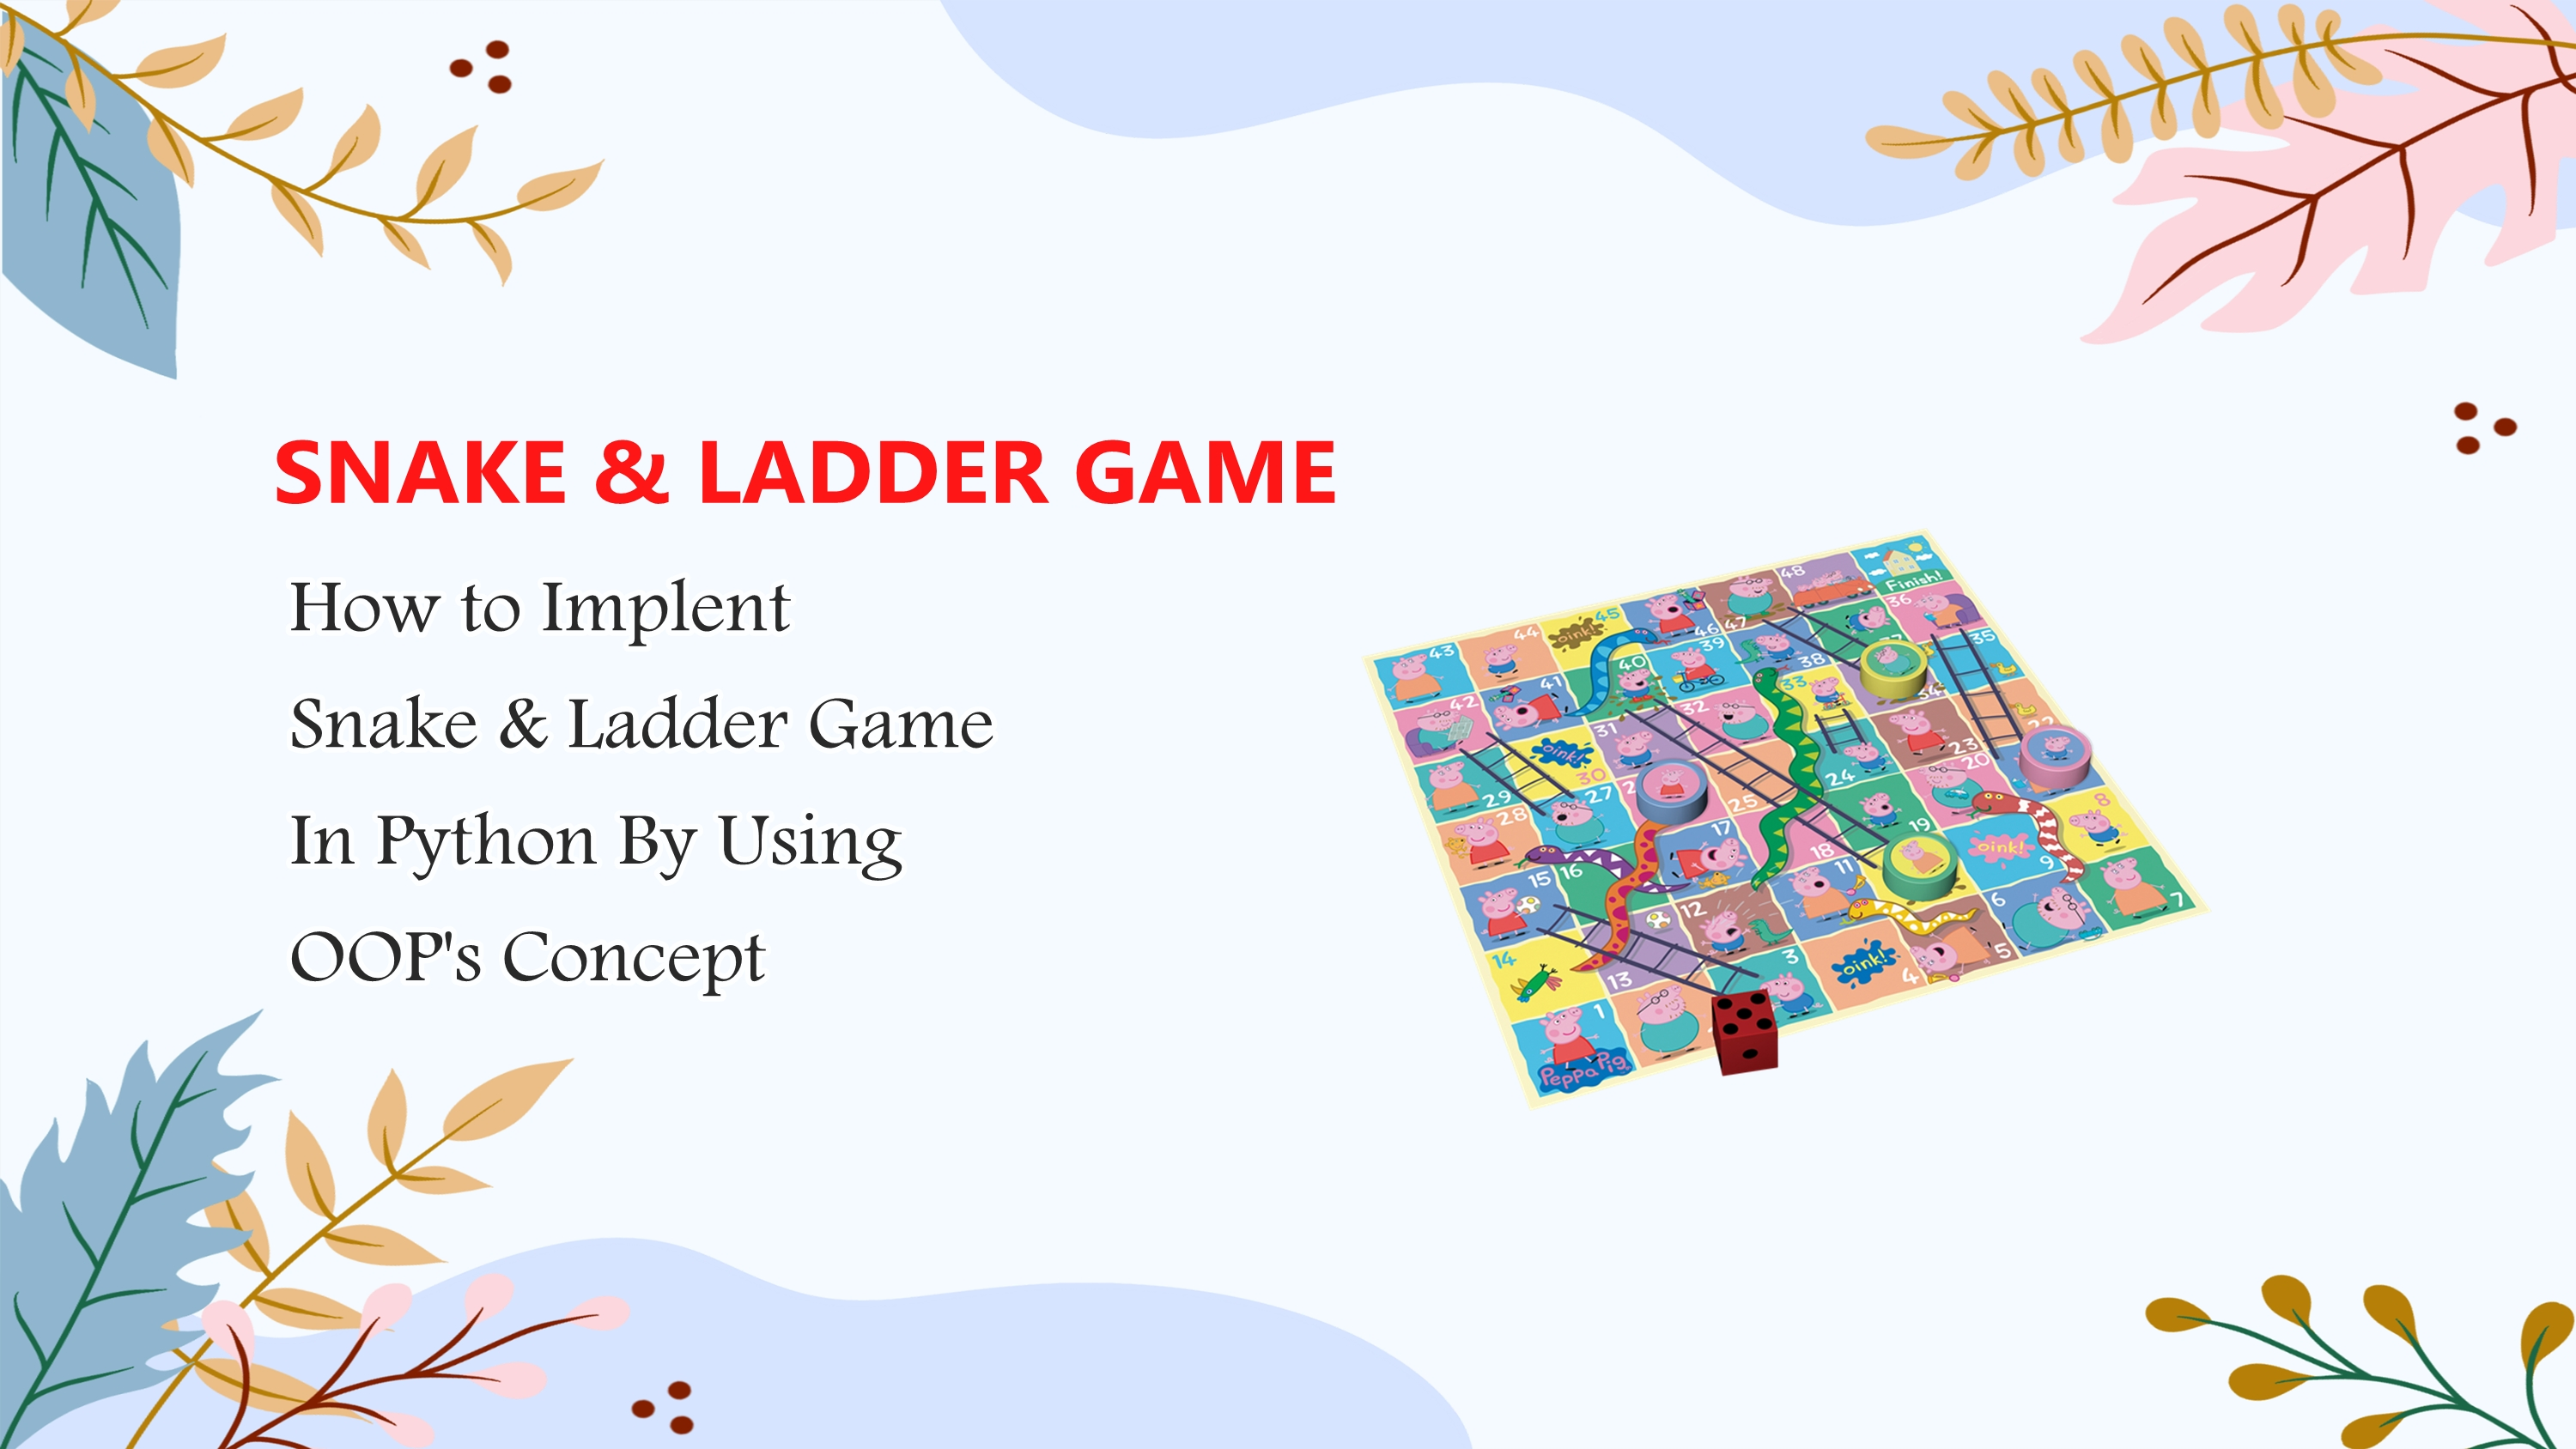

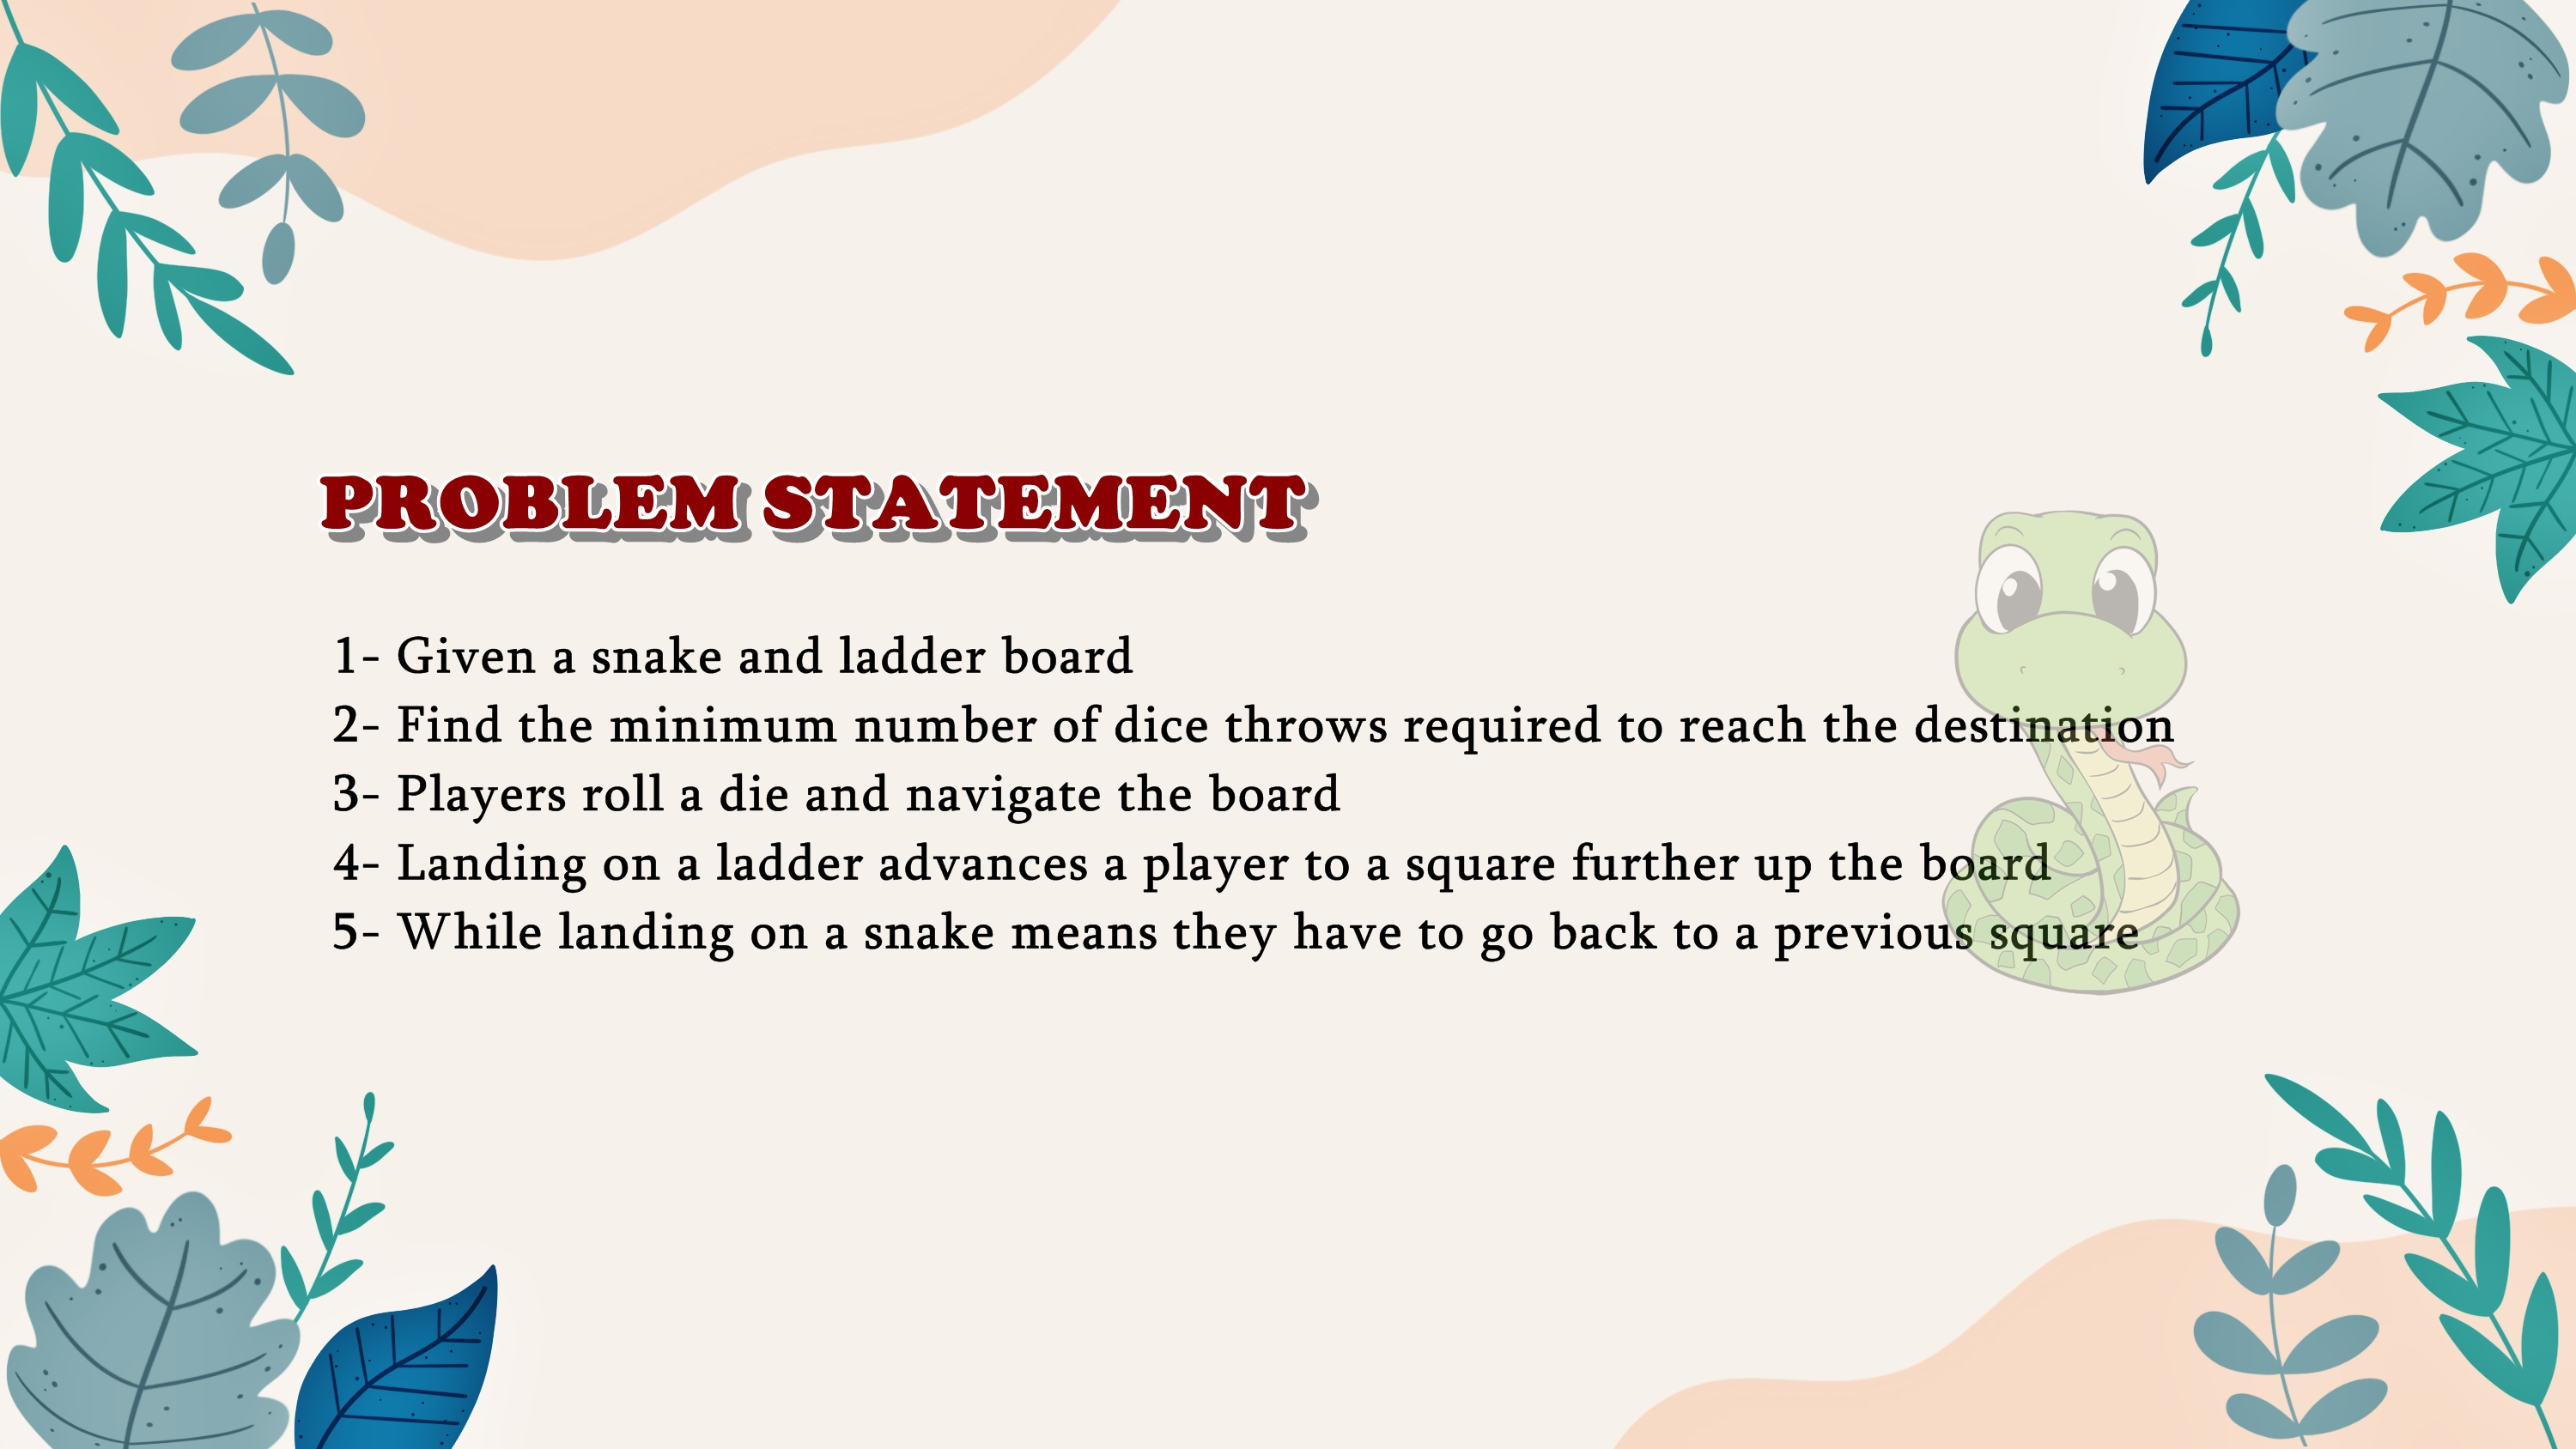

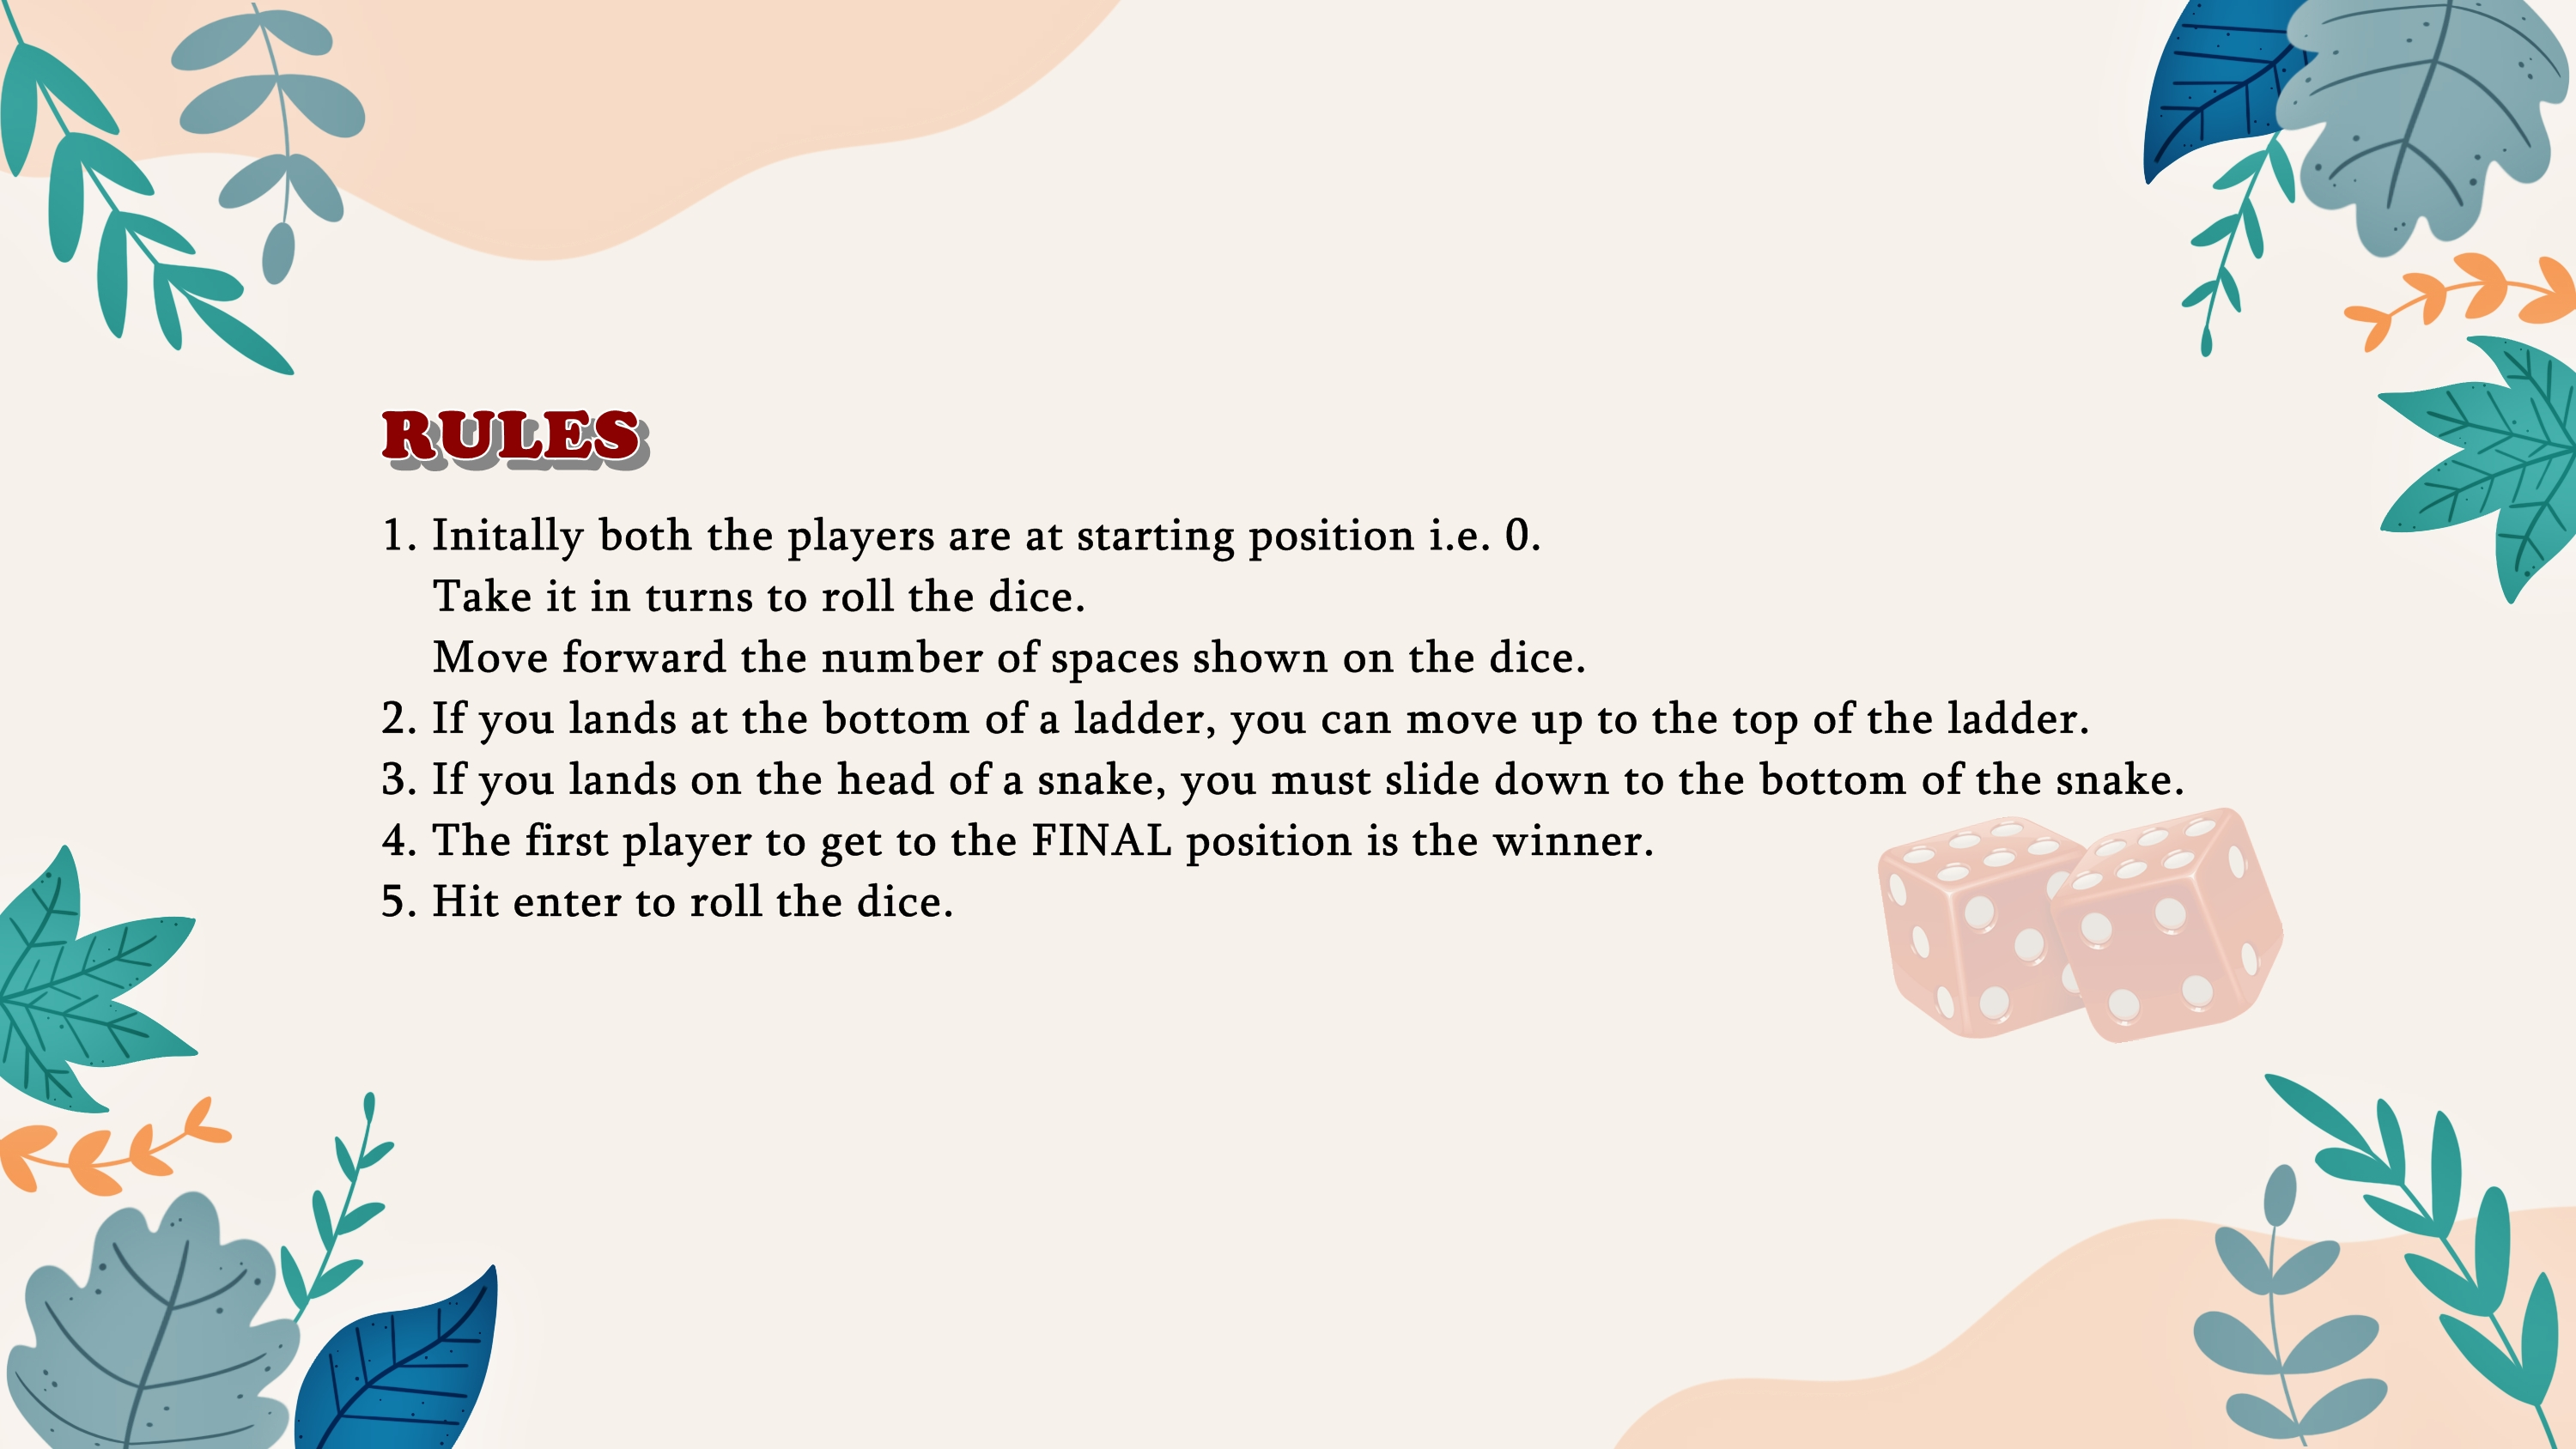

In [1]:
class GamePlayer:
  
    def __init__(self, _id):
        # initial dummy rank -1
        self._id = _id
        # starting position for every player is 1
        self.rank = -1
        self.position = 1
  
    def set_position(self, pos):
        self.position = pos
  
    def set_rank(self, rank):
        self.rank = rank
  
    def get_pos(self):
        return self.position
  
    def get_rank(self):
        return self.rank

## Moving Entity class.

In [2]:
class MovingEntity:
    """
    You can create any moving entity , like snake or ladder or
    wormhole by extending this 
    """
  
    def __init__(self, end_pos=None):
        self.end_pos = end_pos  # end pos where player would be send on board
        self.desc = None  # description of moving entity
  
    def set_description(self, desc):
        self.desc = None
  
    def get_end_pos(self):
        if self.end_pos is None:
            raise Exception("no_end_position_defined")
        return self.end_pos

### Define Snake and Ladder by extending the moving entity.



In [3]:
class Snake(MovingEntity):
    """Snake entity"""
  
    def __init__(self, end_pos=None):
        super(Snake, self).__init__(end_pos)
        self.desc = "Snake"
  
  
class Ladder(MovingEntity):
    """Ladder entity"""
  
    def __init__(self, end_pos=None):
        super(Ladder, self).__init__(end_pos)
        self.desc = "Ladder"

In [4]:
class Board:
    """
    define board with size and moving entities
    """
  
    def __init__(self, size):
        self.size = size
        self.board = {}  # instead of using list, we can use map of {pos:moving_entity} to save space
  
    def get_size(self):
        return self.size
  
    def set_moving_entity(self, pos, moving_entity):
        # set moving entity to pos
        self.board[pos] = moving_entity
  
    def get_next_pos(self, player_pos):
        # get next pos given a specific position player is on
        if player_pos > self.size:
            return player_pos
        if player_pos not in self.board:
            return player_pos
        return self.board[player_pos].get_end_pos()
  
    def at_last_pos(self, pos):
        if pos == self.size:
            return True
        return False

### Defining the Dice class 

In [5]:
class Dice:
    def __init__(self, sides):
      # no of sides in the dice
        self.sides = sides  
  
    def roll(self):
        # return random number between 1 to sides
        import random
        ans = random.randrange(1, self.sides + 1)
        return ans

In [6]:
class Game:
  
    def __init__(self):
        self.board = None  # game board object
        self.dice = None  # game dice object
        self.players = []  # list of game player objects
        self.turn = 0  # curr turn
        self.winner = None
        self.last_rank = 0  # last rank achieved
        self.consecutive_six = 0  # no of consectutive six in one turn, resets every turn
  
    def initialize_game(self, board: Board, dice_sides, players):
        """
      Initialize game using board, dice and players
      """
        self.board = board
        self.dice = Dice(dice_sides)
        self.players = [GamePlayer(i) for i in range(players)]
  
    def can_play(self):
        if self.last_rank != len(self.players):
            return True
        return False
  
    def get_next_player(self):
        """
      Return curr_turn player but if it has already won/completed game , return
      next player which is still active
      """
        while True:
            # if rank is -1 , player is still active so return
            if self.players[self.turn].get_rank() == -1:
                return self.players[self.turn]
            # check next player
            self.turn = (self.turn + 1) % len(self.players)
  
    def move_player(self, curr_player, next_pos):
        # Move player to next_pos
        curr_player.set_position(next_pos)
        if self.board.at_last_pos(curr_player.get_pos()):
            # if at last position set rank
            curr_player.set_rank(self.last_rank + 1)
            self.last_rank += 1
  
    def can_move(self, curr_player, to_move_pos):
        # check if player can move or not ie. between board bound
        if to_move_pos <= self.board.get_size() and curr_player.get_rank() == -1:
            return True
        return False
  
    def change_turn(self, dice_result):
        # change player turn basis dice result.
        # if it's six, do not change .
        # if it's three consecutive sixes or not a six, change
        self.consecutive_six = 0 if dice_result != 6 else self.consecutive_six + 1
        if dice_result != 6 or self.consecutive_six == 3:
            if self.consecutive_six == 3:
                print("Changing turn due to 3 consecutive sixes")
            self.turn = (self.turn + 1) % len(self.players)
        else:
            print(f"One more turn for player {self.turn+1} after rolling 6")
  
    def play(self):
        """
      starting point of game
      game will be player until all players have not been assigned a rank
      # get curr player to play
      # roll dice
      # get next pos of player
      # see if pos is valid to move
      # move player to next pos
      # change turn
      Note: Currently everything is automated, ie. dice roll input is not taken from user.
      if required , we can change that to give some control to user.
      """
        while self.can_play():
            curr_player = self.get_next_player()
            player_input = input(
                f"Player {self.turn+1}, Press enter to roll the dice")
            dice_result = self.dice.roll()
            print(f'dice_result: {dice_result}')
            _next_pos = self.board.get_next_pos(
                curr_player.get_pos() + dice_result)
            if self.can_move(curr_player, _next_pos):
                self.move_player(curr_player, _next_pos)
            self.change_turn(dice_result)
            self.print_game_state()
        self.print_game_result()
  
    def print_game_state(self):
        # Print state of game after every turn
        print('-------------game state-------------')
        for ix, _p in enumerate(self.players):
            print(f'Player: {ix+1} is at pos {_p.get_pos()}')
        print('-------------game state-------------\n\n')
  
    def print_game_result(self):
        # Print final game result with ranks of each player
        print('-------------final result-------------')
        for _p in sorted(self.players, key=lambda x: x.get_rank()):
            print(f'Player: {_p._id+1} , Rank: {_p.get_rank()}')

### Game class and its functions 

In [1]:

class GamePlayer:
    """
    Encapsulates a player properties
    """
  
    def __init__(self, _id):
        self._id = _id
        # initial dummy rank -1
        self.rank = -1
        # starting position for every player is 1
        self.position = 1
  
    def set_position(self, pos):
        self.position = pos
  
    def set_rank(self, rank):
        self.rank = rank
  
    def get_pos(self):
        return self.position
  
    def get_rank(self):
        return self.rank
  
  
class MovingEntity:
    """
    You can create any moving entity , like snake or ladder or
    wormhole by extending this
    """
  
    def __init__(self, end_pos=None):
      # end pos where player would be send on board
        self.end_pos = end_pos
        # description of moving entity
        self.desc = None
  
    def set_description(self, desc):
        self.desc = None
  
    def get_end_pos(self):
        if self.end_pos is None:
            raise Exception("no_end_position_defined")
        return self.end_pos
  
  
class Snake(MovingEntity):
    """Snake entity"""
  
    def __init__(self, end_pos=None):
        super(Snake, self).__init__(end_pos)
        self.desc = "Bit by Snake"
  
  
class Ladder(MovingEntity):
    """Ladder entity"""
  
    def __init__(self, end_pos=None):
        super(Ladder, self).__init__(end_pos)
        self.desc = "Climbed Ladder"
  
  
class Board:
    """
    define board with size and moving entities
    """
  
    def __init__(self, size):
        self.size = size
        # instead of using list, we can use map of
        # {pos:moving_entity} to save space
        self.board = {}
  
    def get_size(self):
        return self.size
  
    def set_moving_entity(self, pos, moving_entity):
        # set moving entity to pos
        self.board[pos] = moving_entity
  
    def get_next_pos(self, player_pos):
        # get next pos given a specific position player is on
        if player_pos > self.size:
            return player_pos
        if player_pos not in self.board:
            return player_pos
        print(f'{self.board[player_pos].desc} at {player_pos}')
        return self.board[player_pos].get_end_pos()
  
    def at_last_pos(self, pos):
        if pos == self.size:
            return True
        return False
  
  
class Dice:
    def __init__(self, sides):
      # no of sides in the dice
        self.sides = sides
  
    def roll(self):
        # return random number between 1 to sides
        import random
        ans = random.randrange(1, self.sides + 1)
        return ans
  
  
class Game:
  
    def __init__(self):
      # game board object
        self.board = None
        # game dice object
        self.dice = None
        # list of game player objects
        self.players = []
        # curr turn
        self.turn = 0
        self.winner = None
        # last rank achieved
        self.last_rank = 0
        # no of consectutive six in one turn, resets every turn
        self.consecutive_six = 0
  
    def initialize_game(self, board: Board, dice_sides, players):
        """
      Initialize game using board, dice and players
      """
        self.board = board
        self.dice = Dice(dice_sides)
        self.players = [GamePlayer(i) for i in range(players)]
  
    def can_play(self):
        if self.last_rank != len(self.players):
            return True
        return False
  
    def get_next_player(self):
        """
      Return curr_turn player but if it has already won/completed game , return
      next player which is still active
      """
        while True:
            # if rank is -1 , player is still active so return
            if self.players[self.turn].get_rank() == -1:
                return self.players[self.turn]
            # check next player
            self.turn = (self.turn + 1) % len(self.players)
  
    def move_player(self, curr_player, next_pos):
        # Move player to next_pos
        curr_player.set_position(next_pos)
        if self.board.at_last_pos(curr_player.get_pos()):
            # if at last position set rank
            curr_player.set_rank(self.last_rank + 1)
            self.last_rank += 1
  
    def can_move(self, curr_player, to_move_pos):
        # check if player can move or not ie. between board bound
        if to_move_pos <= self.board.get_size() and curr_player.get_rank() == -1:
            return True
        return False
  
    def change_turn(self, dice_result):
        # change player turn basis dice result.
        # if it's six, do not change .
        # if it's three consecutive sixes or not a six, change
        self.consecutive_six = 0 if dice_result != 6 else self.consecutive_six + 1
        if dice_result != 6 or self.consecutive_six == 3:
            if self.consecutive_six == 3:
                print("Changing turn due to 3 consecutive sixes")
            self.turn = (self.turn + 1) % len(self.players)
        else:
            print(f"One more turn for player {self.turn+1} after rolling 6")
  
    def play(self):
        """
      starting point of game
      game will be player until all players have not been assigned a rank
      # get curr player to play
      # roll dice
      # get next pos of player
      # see if pos is valid to move
      # move player to next pos
      # change turn
      Note: Currently everything is automated, ie. dice roll input is not taken from user.
      if required , we can change that to give some control to user.
      """
        while self.can_play():
            curr_player = self.get_next_player()
            player_input = input(
                f"Player {self.turn+1}, Press enter to roll the dice")
            dice_result = self.dice.roll()
            print(f'dice_result: {dice_result}')
            _next_pos = self.board.get_next_pos(
                curr_player.get_pos() + dice_result)
            if self.can_move(curr_player, _next_pos):
                self.move_player(curr_player, _next_pos)
            self.change_turn(dice_result)
            self.print_game_state()
        self.print_game_result()
  
    def print_game_state(self):
        # Print state of game after every turn
        print('-------------game state-------------')
        for ix, _p in enumerate(self.players):
            print(f'Player: {ix+1} is at pos {_p.get_pos()}')
        print('-------------game state-------------\n\n')
  
    def print_game_result(self):
        # Print final game result with ranks of each player
        print('-------------final result-------------')
        for _p in sorted(self.players, key=lambda x: x.get_rank()):
            print(f'Player: {_p._id+1} , Rank: {_p.get_rank()}')
  
  
def sample_run():
    # a simple flow of the game
    # here we create a board of size 10 and dice of side 6
    # set snake at 5 with end at 2
    # set ladder at 4 with end at 6
    board = Board(10)
    board.set_moving_entity(7, Snake(2))
    board.set_moving_entity(4, Ladder(6))
    game = Game()
    game.initialize_game(board, 6, 2)
    game.play()
  
  
sample_run()

Player 1, Press enter to roll the dice4
dice_result: 6
Bit by Snake at 7
One more turn for player 1 after rolling 6
-------------game state-------------
Player: 1 is at pos 2
Player: 2 is at pos 1
-------------game state-------------


Player 1, Press enter to roll the dice3
dice_result: 3
-------------game state-------------
Player: 1 is at pos 5
Player: 2 is at pos 1
-------------game state-------------


Player 2, Press enter to roll the dice3
dice_result: 1
-------------game state-------------
Player: 1 is at pos 5
Player: 2 is at pos 2
-------------game state-------------


Player 1, Press enter to roll the dice4
dice_result: 4
-------------game state-------------
Player: 1 is at pos 9
Player: 2 is at pos 2
-------------game state-------------


Player 2, Press enter to roll the dice2
dice_result: 5
Bit by Snake at 7
-------------game state-------------
Player: 1 is at pos 9
Player: 2 is at pos 2
-------------game state-------------


Player 1, Press enter to roll the dice6
dice_r

# Thank You!!!